In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math
import pandas as pd
from datetime import datetime

from operator import itemgetter
from os import path, system
from statistics import mode
import numpy as np


In [62]:
new_york_city = pd.read_csv('c:\\Users\\nnagaraj\\Desktop\\bike_share\\new_york_city.csv')
nyc = pd.DataFrame(new_york_city)
nyc.iloc[:,1:3] = nyc.iloc[:,1:3].apply(pd.to_datetime, errors = 'coerce')
nyc['Start Day'] = nyc['Start Time'].dt.weekday_name
nyc['Start Month'] = nyc['Start Time'].dt.month
nyc.head()

,Unnamed: 0,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year,Start Day,Start Month
0,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998.0,Sunday,6
1,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981.0,Thursday,5
2,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987.0,Wednesday,3
3,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986.0,Monday,5
4,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992.0,Wednesday,6


# User Filter for Month and Day ( 6, Sunday) ##

In [63]:
nyc_analysis = nyc.loc[(nyc['Start Month'] ==6) & (nyc['Start Day']=='Sunday')]
nyc_analysis.head()

,Unnamed: 0,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year,Start Day,Start Month
0,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998.0,Sunday,6
83,6067227,2017-06-18 13:36:24,2017-06-18 14:10:33,2048,E 33 St & 2 Ave,Cherry St,Subscriber,Male,1942.0,Sunday,6
127,5664204,2017-06-11 01:11:04,2017-06-11 01:42:57,1913,Henry St & Grand St,Broadway & W 24 St,Subscriber,Male,1981.0,Sunday,6
141,6467971,2017-06-25 14:33:29,2017-06-25 14:58:08,1479,E 66 St & Madison Ave,5 Ave & E 103 St,Customer,NaN,NaN,Sunday,6
167,5298343,2017-06-04 14:41:04,2017-06-04 14:49:34,509,E 89 St & York Ave,E 102 St & 1 Ave,Subscriber,Female,1967.0,Sunday,6


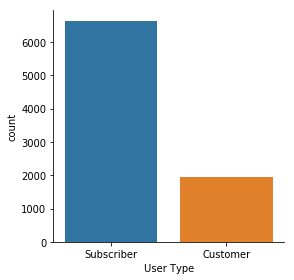

In [92]:
sns.factorplot('User Type', data = nyc_analysis, kind='count')

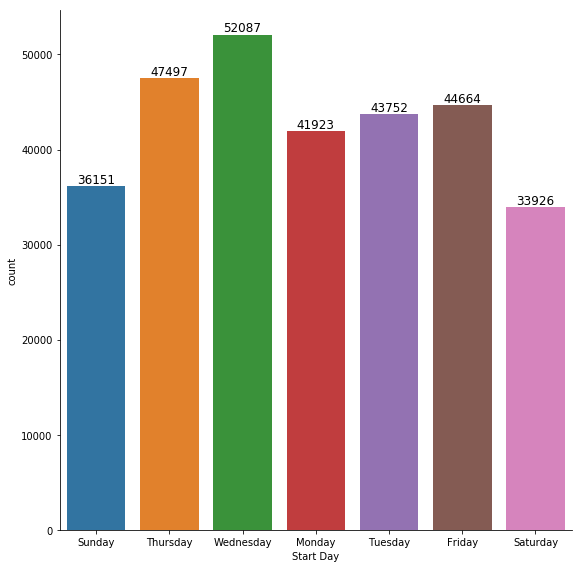

In [111]:
sns.factorplot('Start Day', data=nyc, kind='count', size=8 )
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),'%d' % int(p.get_height()), fontsize=12, ha='center',va='bottom')
plt.show()

[('Customer', 1949), ('Subscriber', 6637)]

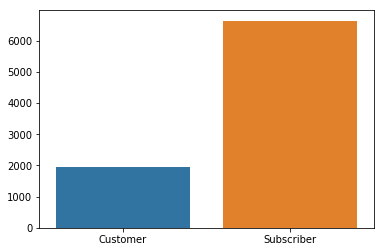

In [93]:
usertype = dict(nyc_analysis.groupby('User Type').size())
usertype_lists = sorted(usertype.items())
x,y = zip(*usertype_lists)
sns.barplot(x,y,)

usertype_lists